In [1]:
# Importing Relevant Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading Data

killed_df =  pd.read_csv("/content/drive/MyDrive/Mitacs Project/Road_Accidents_2017-Annuxure_Tables_3.csv")
injured_df =  pd.read_csv("/content/drive/MyDrive/Mitacs Project/Road_Accidents_2017-Annuxure_Tables_4.csv")

weather_df =  pd.read_csv("/content/drive/MyDrive/Mitacs Project/Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv")
roadcond_df =  pd.read_csv("/content/drive/MyDrive/Mitacs Project/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv")

In [3]:
# Data Cleanup

killed_df = killed_df.drop(columns = ['Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2017',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2016',
       'Total Number of Persons Killed in Road Accidents Per Lakh Population - 2017',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2016',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2014',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2015',
       'Total Number of Persons Killed in Road Accidents per 10,000 Km of Roads - 2016'])
injured_df = injured_df.drop(columns = ['Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2014',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2015',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2016',
       'Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2017',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2014',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2015',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2016',
       'Total Number of Persons Injured in Road Accidents Per Lakh Population - 2017',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Vehicles - 2016',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2014',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2015',
       'Total Number of Persons injured in Road Accidents per 10,000 Km of Roads - 2016'])

In [4]:
killed_df = killed_df.rename(columns = {'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2014':2014,
                                       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2015':2015,
                                       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2016':2016,
                                       'State/UT-wise Total Number of Persons Killed in Road Accidents during - 2017':2017})
injured_df = injured_df.rename(columns = {'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2014':2014,
                                       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2015':2015,
                                       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2016':2016,
                                       'State/UT-wise Total Number of Persons Injured in Road Accidents during - 2017':2017})
roadcond_df =  roadcond_df.rename(columns = {'State/ UT':'States/UTs'})
weather_df =  weather_df.rename(columns = {'State/ UT':'States/UTs'})     

In [5]:
# Dividing States into Zones and Adding a Column

north_india = ['Jammu & Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh', 'Jammu and Kashmir', 'Delhi']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal', 'Orissa']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Andaman & Nicobar Islands', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'A & N Islands', 'D & N Haveli']

In [9]:
def get_zonal_names(row):
    if row['States/UTs'].strip() in north_india:
        val = 'North Zone'
    elif row['States/UTs'].strip()  in south_india:
        val = 'South Zone'
    elif row['States/UTs'].strip()  in east_india:
        val = 'East Zone'
    elif row['States/UTs'].strip()  in west_india:
        val = 'West Zone'
    elif row['States/UTs'].strip()  in central_india:
        val = 'Central Zone'
    elif row['States/UTs'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['States/UTs'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

In [10]:
killed_df.drop(killed_df[killed_df['States/UTs'] == 'Total'].index, inplace=True)
killed_df['Zones'] = killed_df.apply(get_zonal_names, axis=1)
injured_df.drop(injured_df[injured_df['States/UTs'] == 'Total'].index, inplace=True)
injured_df['Zones'] = injured_df.apply(get_zonal_names, axis=1)
roadcond_df.drop(roadcond_df[roadcond_df['States/UTs'] == 'Total'].index, inplace=True)
roadcond_df['Zones'] = roadcond_df.apply(get_zonal_names, axis=1)
weather_df.drop(weather_df[weather_df['States/UTs'] == 'Total'].index, inplace=True)
weather_df['Zones'] = weather_df.apply(get_zonal_names, axis=1)

In [11]:
# Separating Features in the Weather and Road Condition Dataframe

total_col = [col for col in weather_df.columns if 'Total' in col]
killed_col = [col for col in weather_df.columns if 'Killed' in col]
injured_col = [col for col in weather_df.columns if 'Injured' in col]
weather_df_killed = weather_df.drop(columns = total_col+injured_col)
weather_df_injured = weather_df.drop(columns = total_col+killed_col)

In [12]:
total_col = [col for col in roadcond_df.columns if 'Accident' in col]
killed_col = [col for col in roadcond_df.columns if 'Killed' in col]
injured_col = [col for col in roadcond_df.columns if 'Injured' in col]
roadcond_df_killed = roadcond_df.drop(columns = total_col+injured_col)
roadcond_df_injured = roadcond_df.drop(columns = total_col+killed_col)

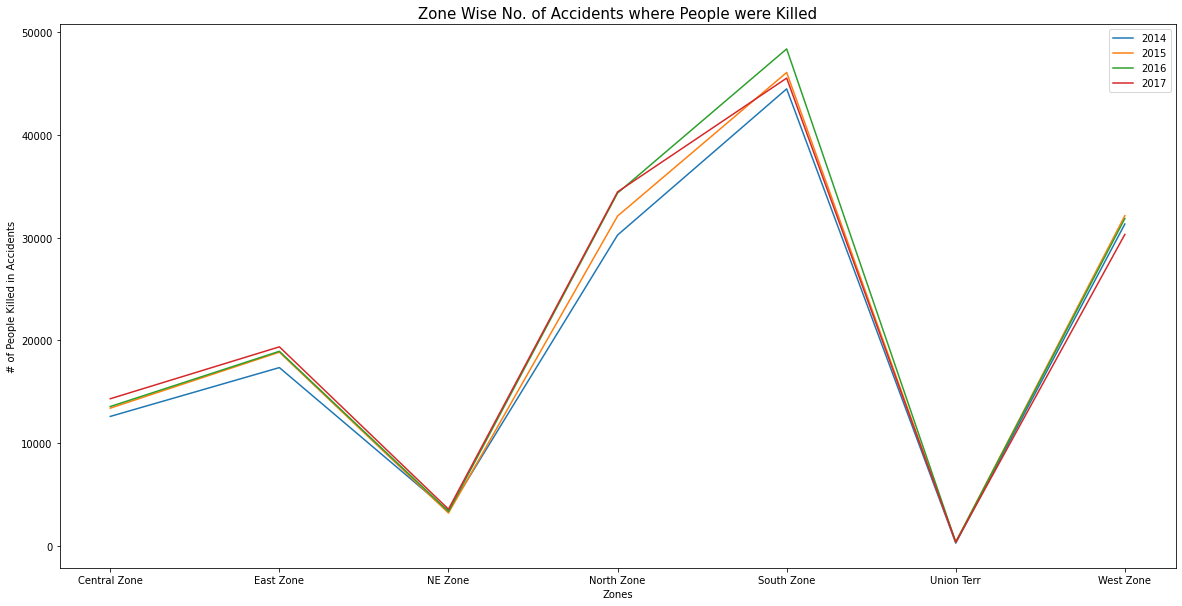

In [13]:
# Zone Wise No. of Accidents where People were Killed

df =pd.pivot_table(killed_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Killed', fontsize=15)

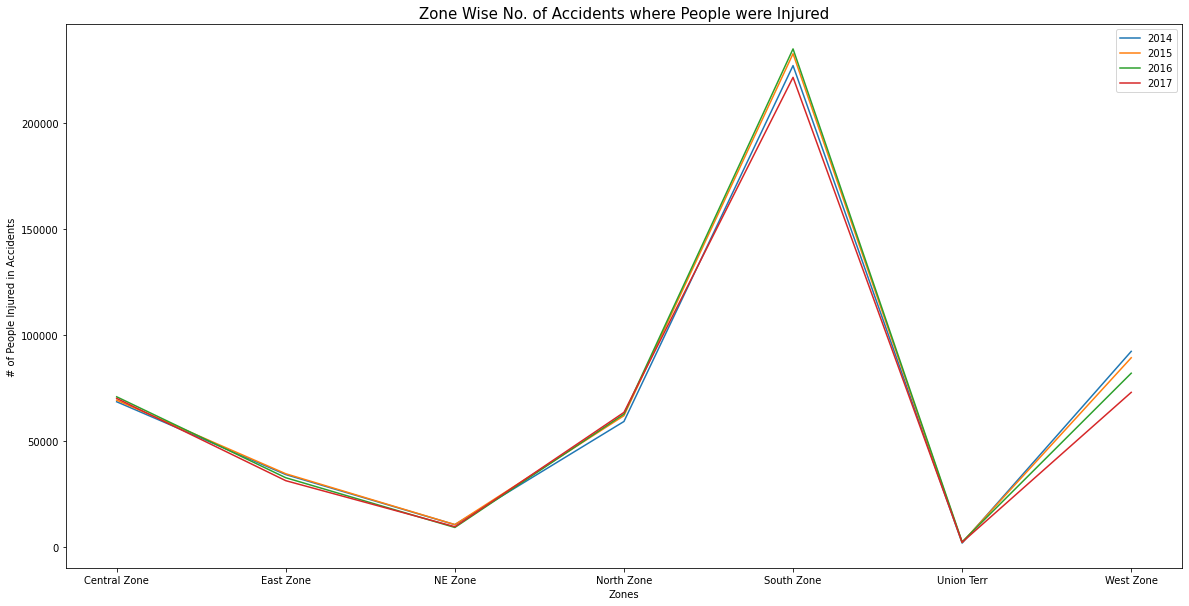

In [14]:
# Zone Wise No. of Accidents where People were Injured

df =pd.pivot_table(injured_df, index=['Zones'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.lineplot(x=df['Zones'],y=df[year], label=years[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Zone Wise No. of Accidents where People were Injured', fontsize=15)

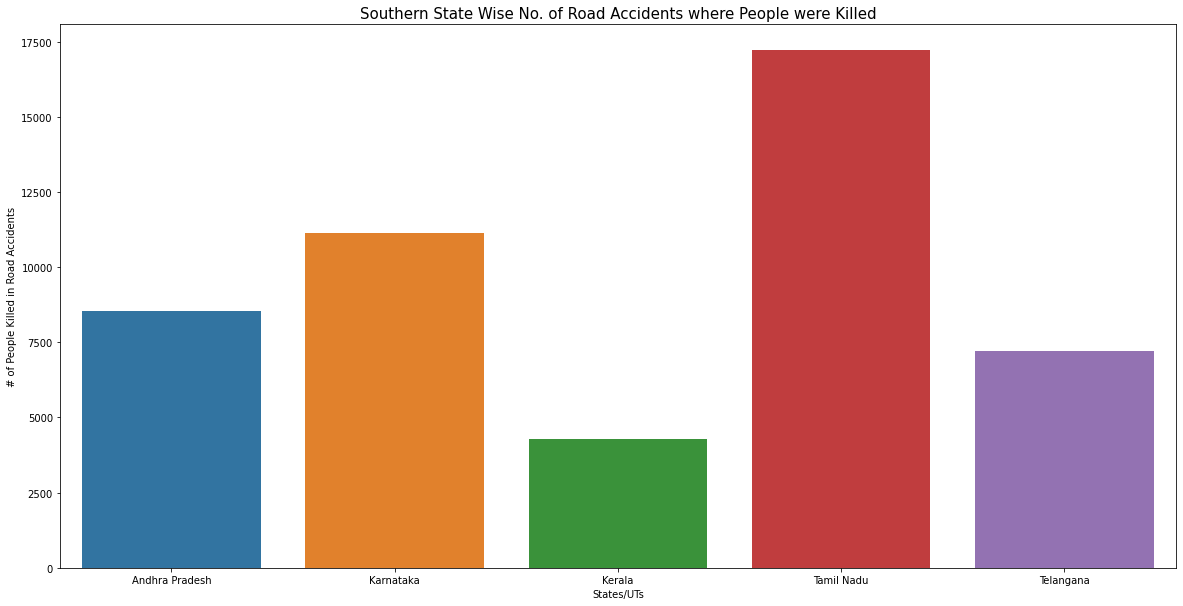

In [15]:
# Southern-Zone States: No. of Road Accidents where People were Killed

sub_df = killed_df[killed_df['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Killed in Road Accidents')
    plt.title('Southern State Wise No. of Road Accidents where People were Killed', fontsize=15)

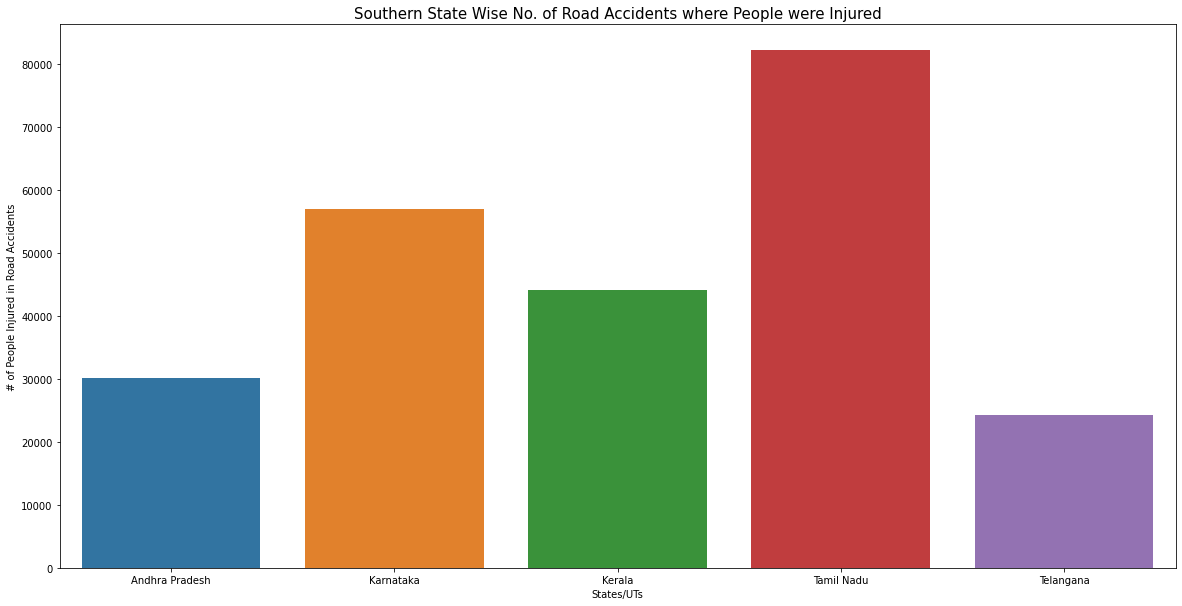

In [16]:
#Southern-Zone States: No. of Road Accidents where People were Injured

sub_df = injured_df[injured_df['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Injured in Road Accidents')
    plt.title('Southern State Wise No. of Road Accidents where People were Injured', fontsize=15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

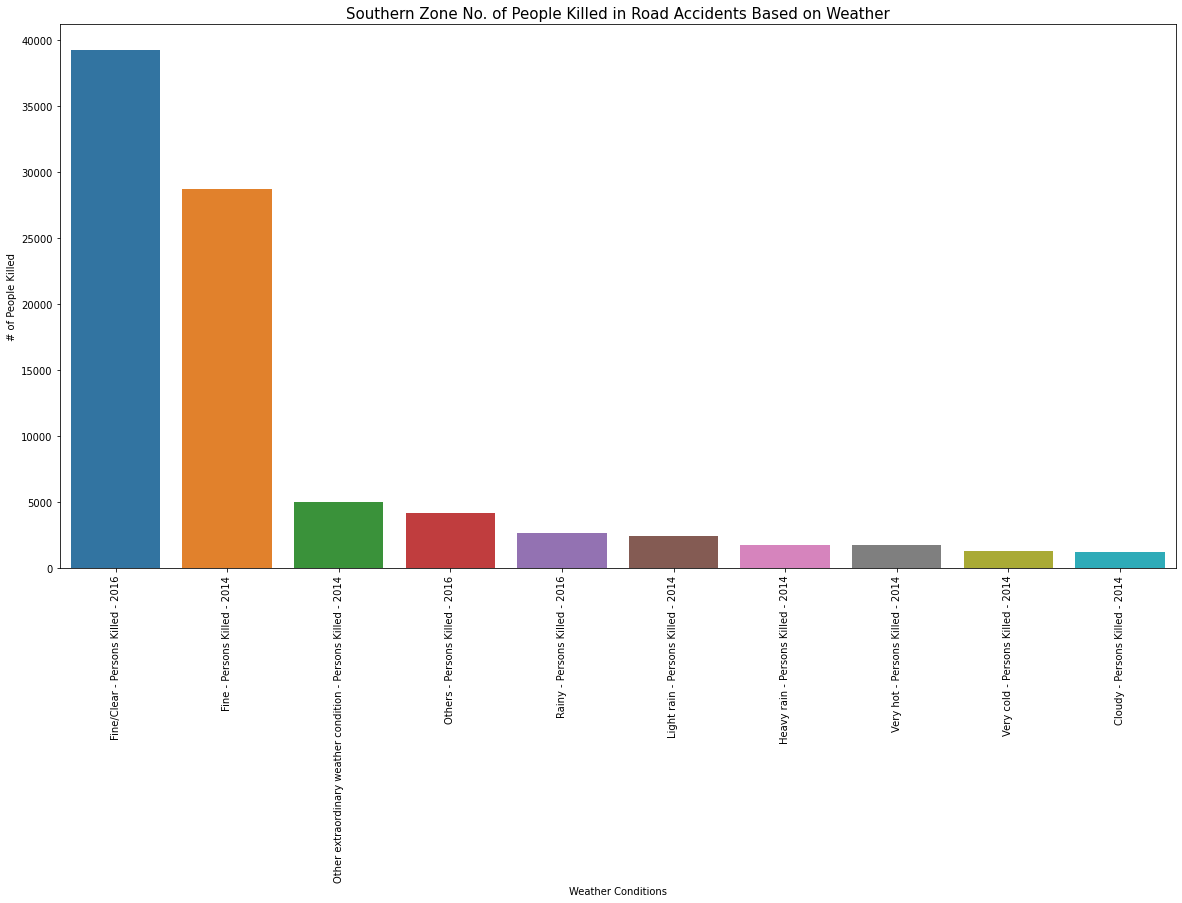

In [17]:
# Weather Conditions - No. of People Killed in Road Accidents (South Zone)

sub_df = weather_df_killed[weather_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Southern Zone No. of People Killed in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

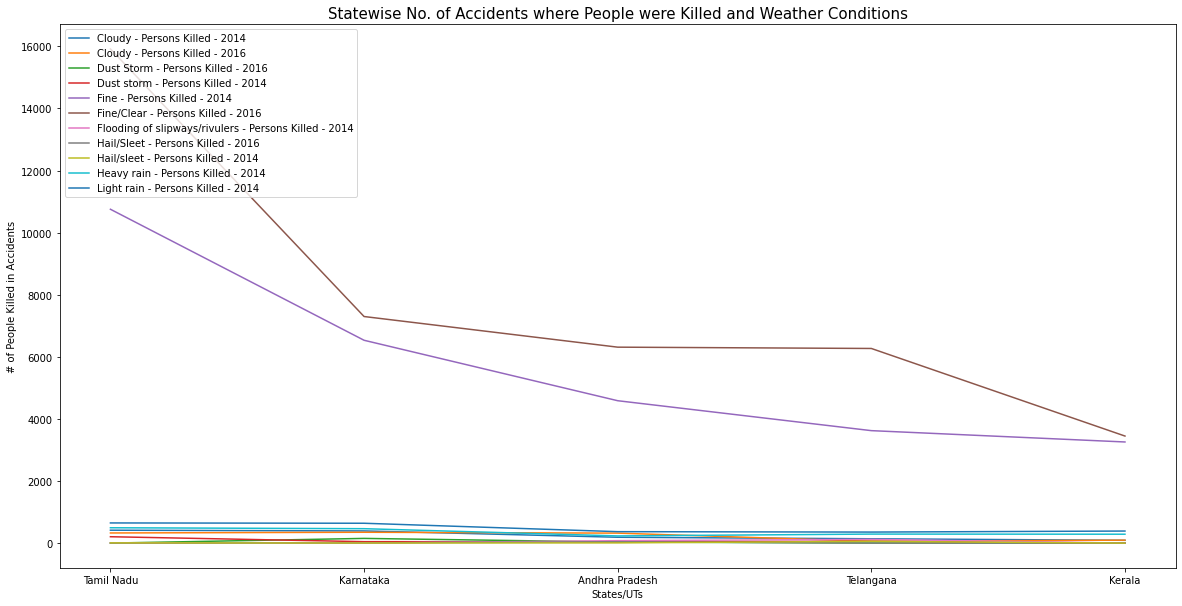

In [18]:
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

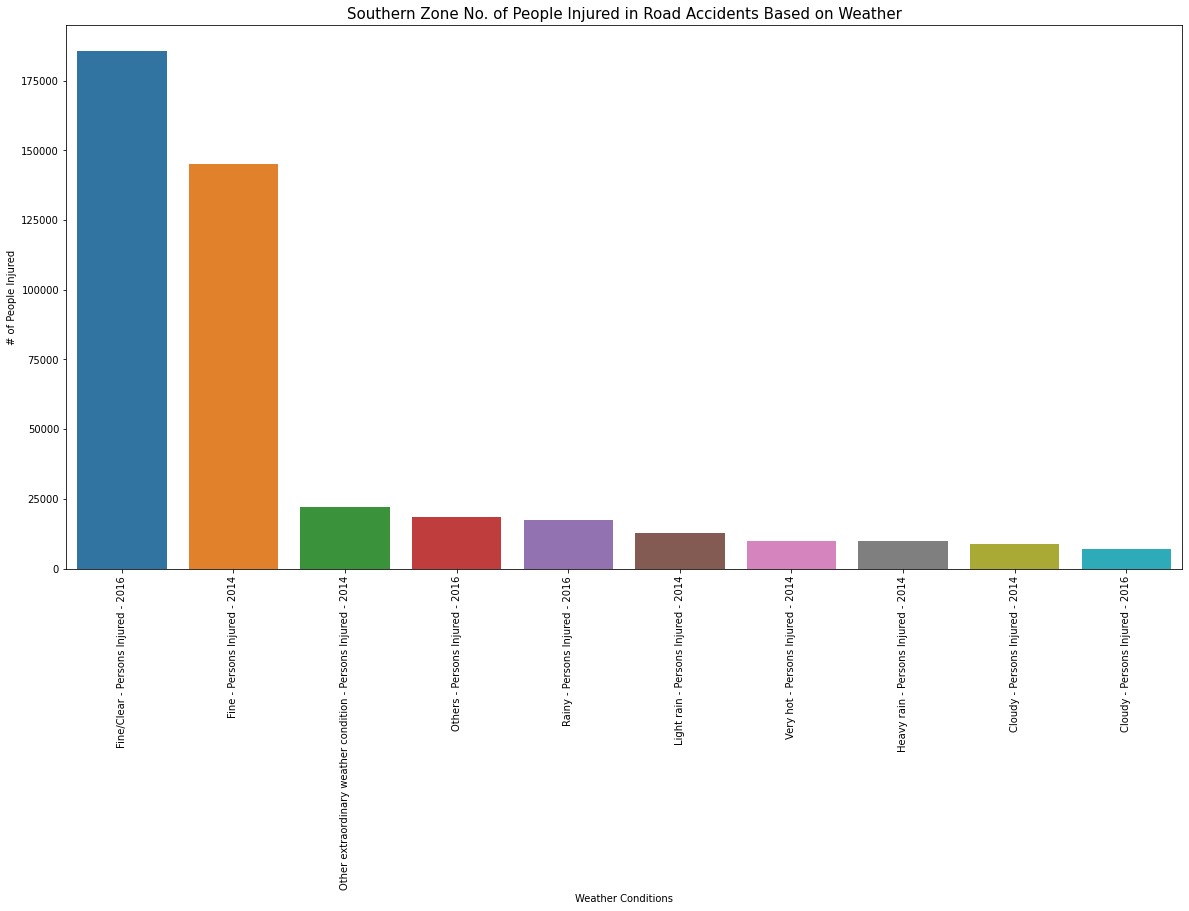

In [19]:
# Weather Conditions - No. of People Injured in Road Accidents (South Zone)

sub_df = weather_df_injured[weather_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Southern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

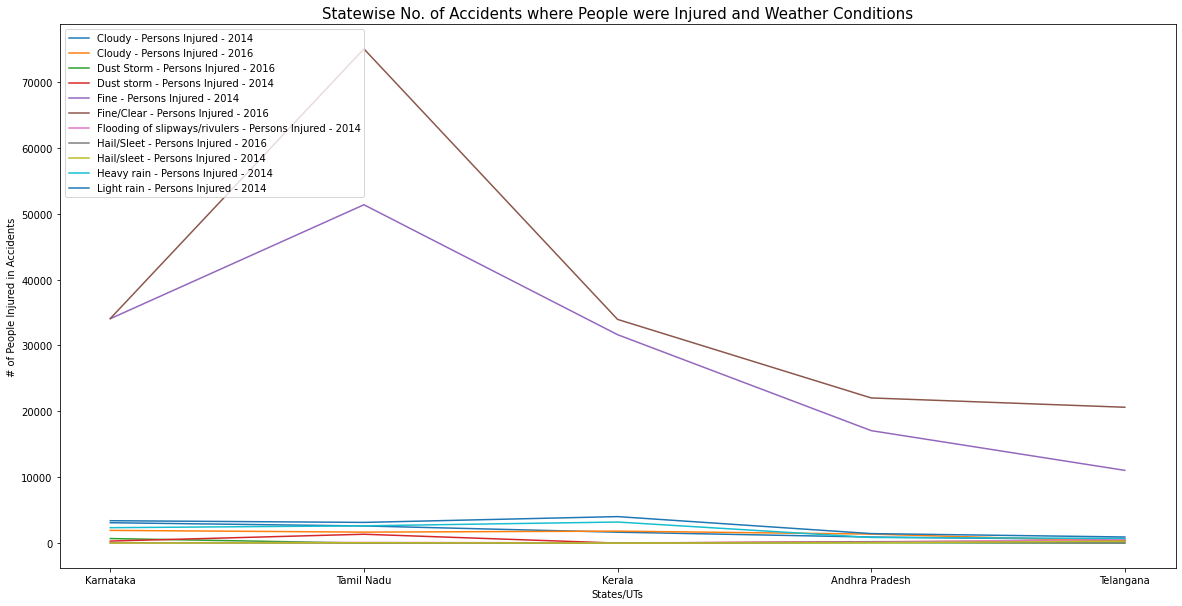

In [20]:
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

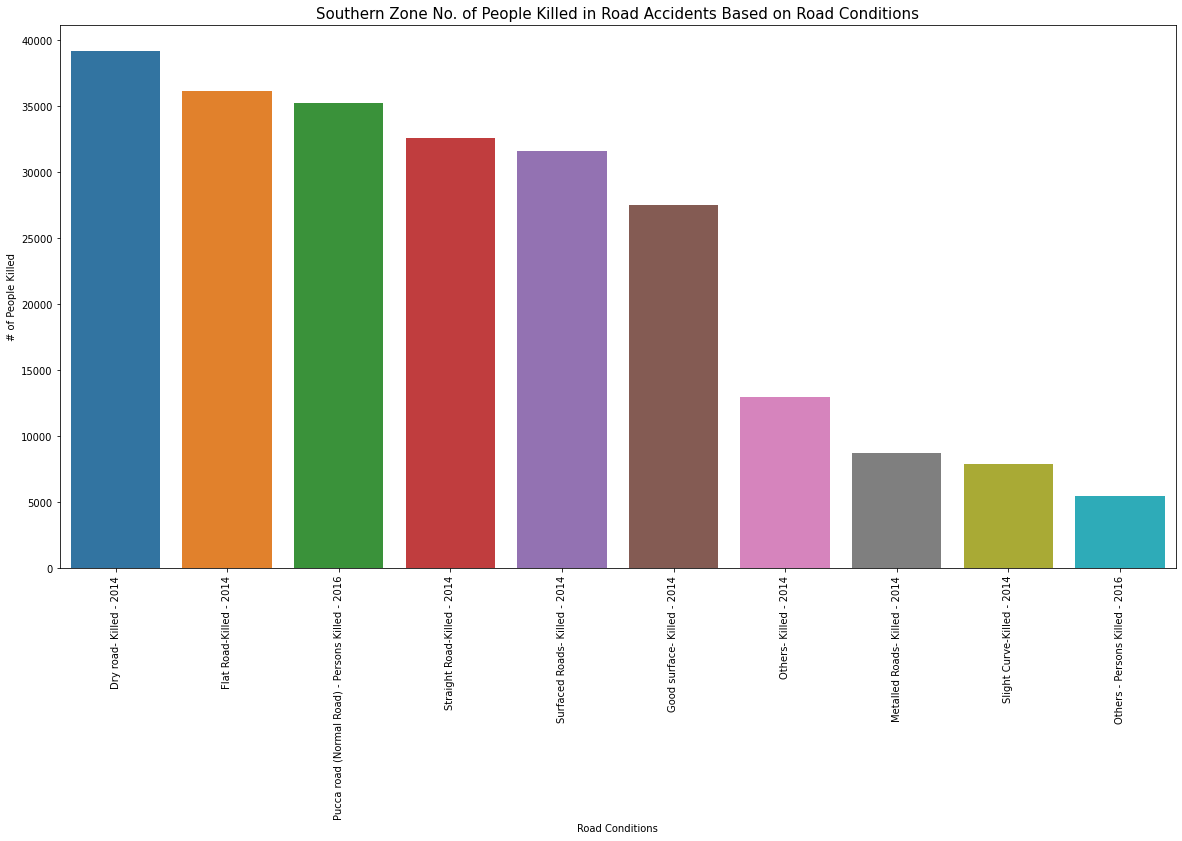

In [21]:
# Road Conditions - No. of People Killed in Road Accidents (South Zone)

sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Southern Zone No. of People Killed in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

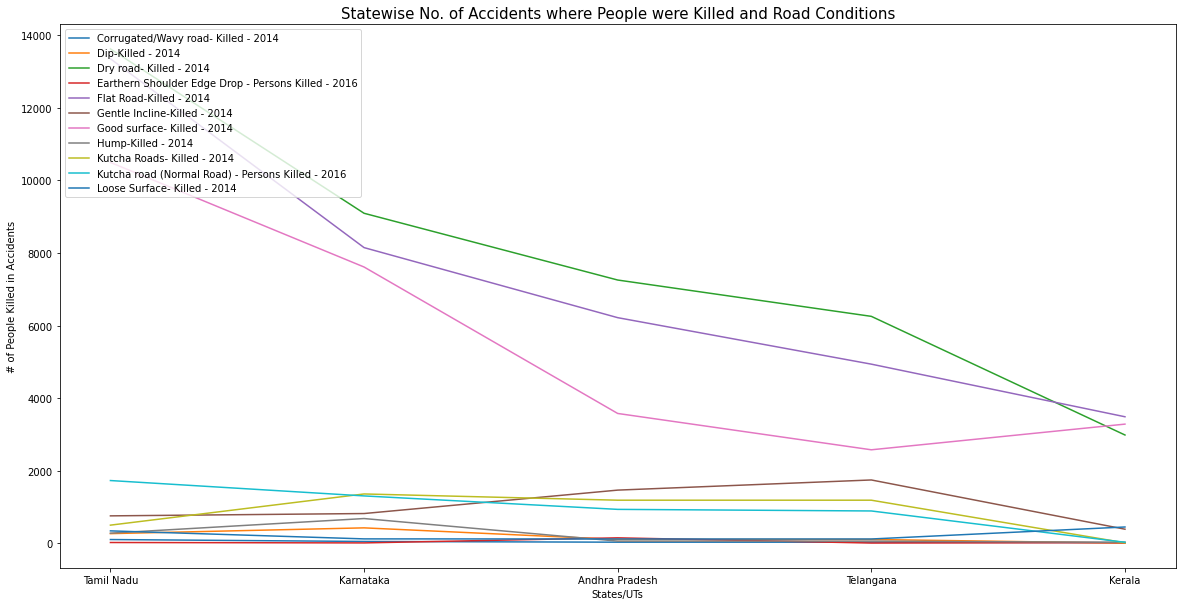

In [22]:
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

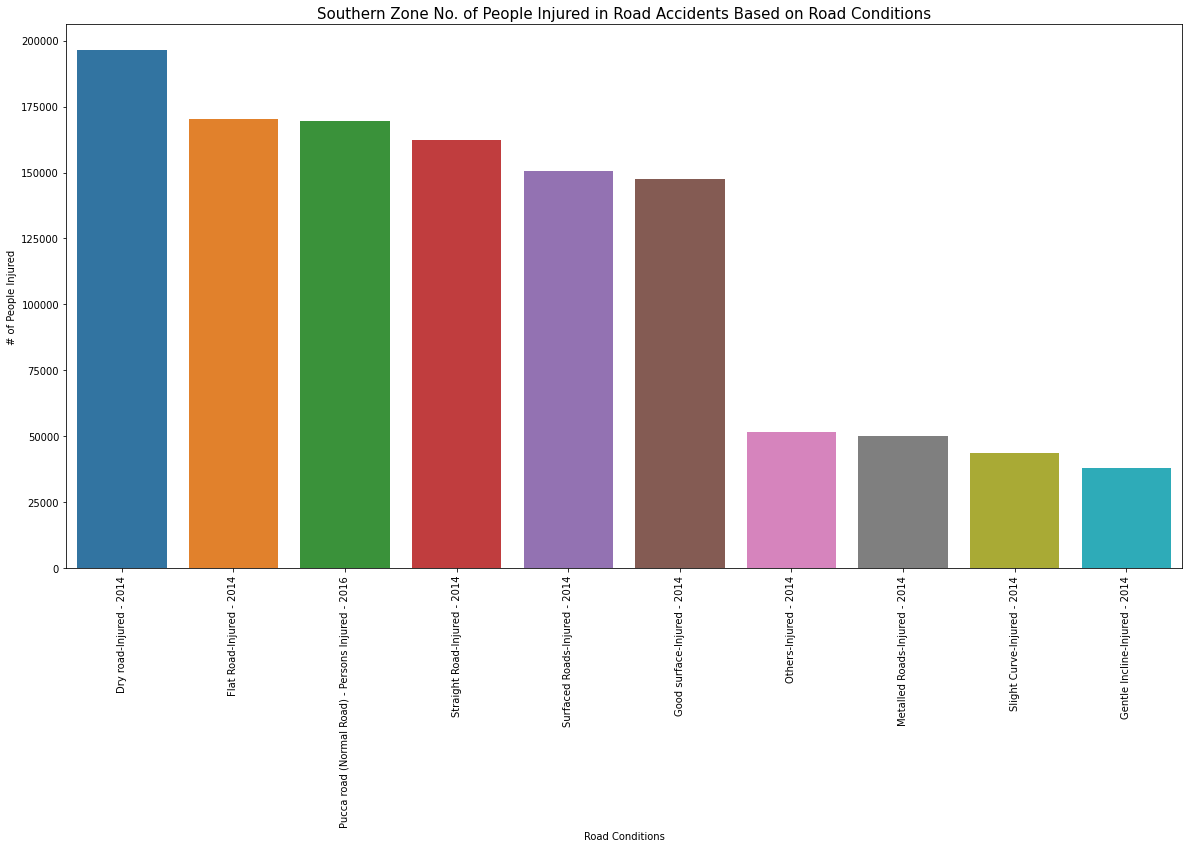

In [23]:
# Road Conditions - No. of People Injured in Road Accidents (South Zone)

sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Southern Zone No. of People Injured in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

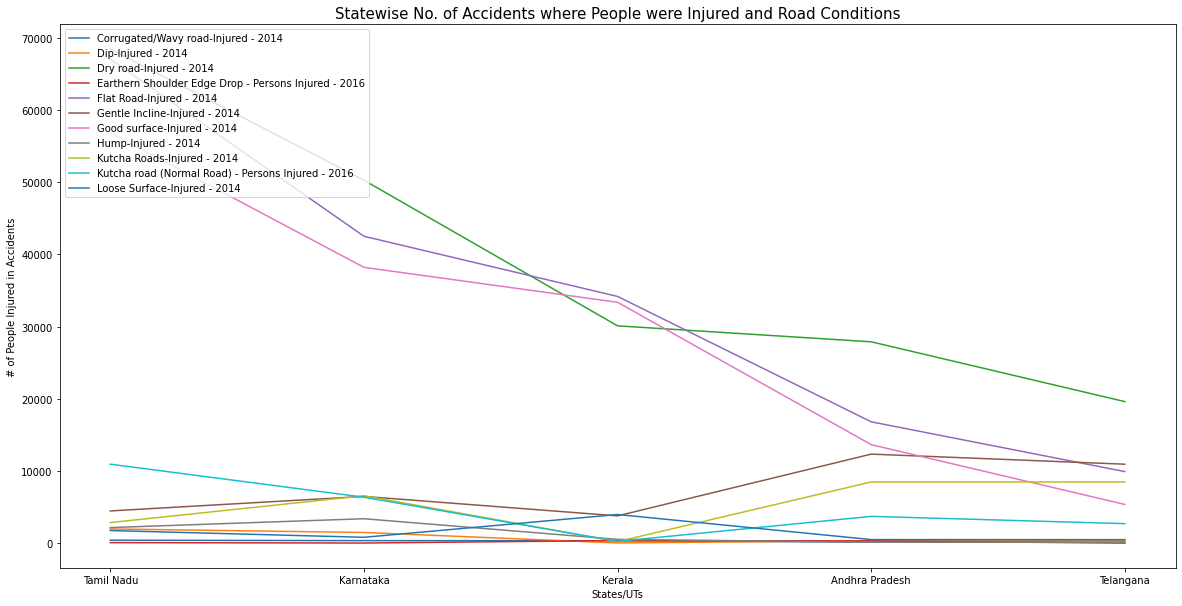

In [24]:
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'South Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(5)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')


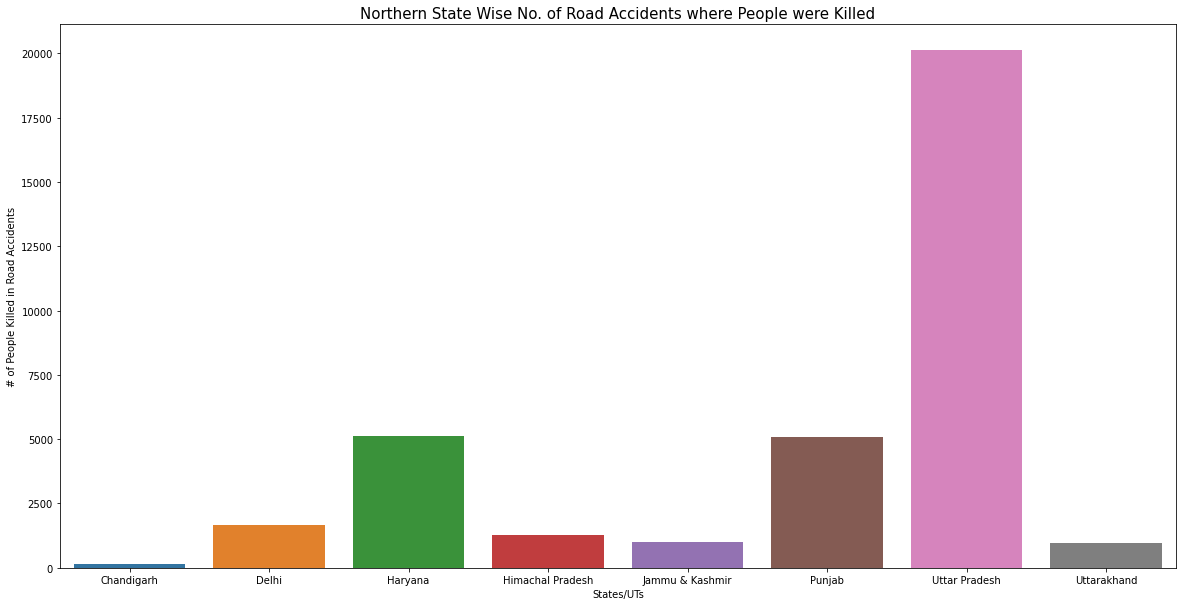

In [25]:
# Northern-Zone States: No. of Road Accidents where People were Killed

sub_df = killed_df[killed_df['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Killed in Road Accidents')
    plt.title('Northern State Wise No. of Road Accidents where People were Killed', fontsize=15)

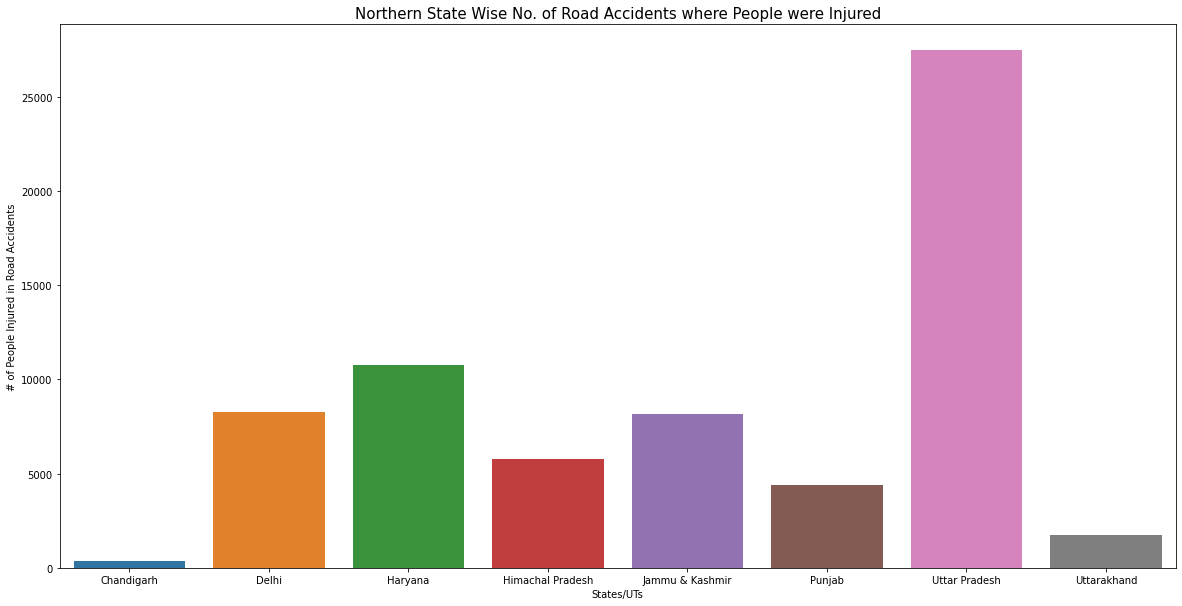

In [26]:
# Northern-Zone States: No. of Road Accidents where People were Injured

sub_df = injured_df[injured_df['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],values=[2014, 2015, 2016, 2017],aggfunc=np.sum).reset_index()
df

years = [2014,2015,2016,2017]
fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,year in enumerate(years):
    sns.barplot(x=df['States/UTs'],y=df[year])
    plt.ylabel('# of People Injured in Road Accidents')
    plt.title('Northern State Wise No. of Road Accidents where People were Injured', fontsize=15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

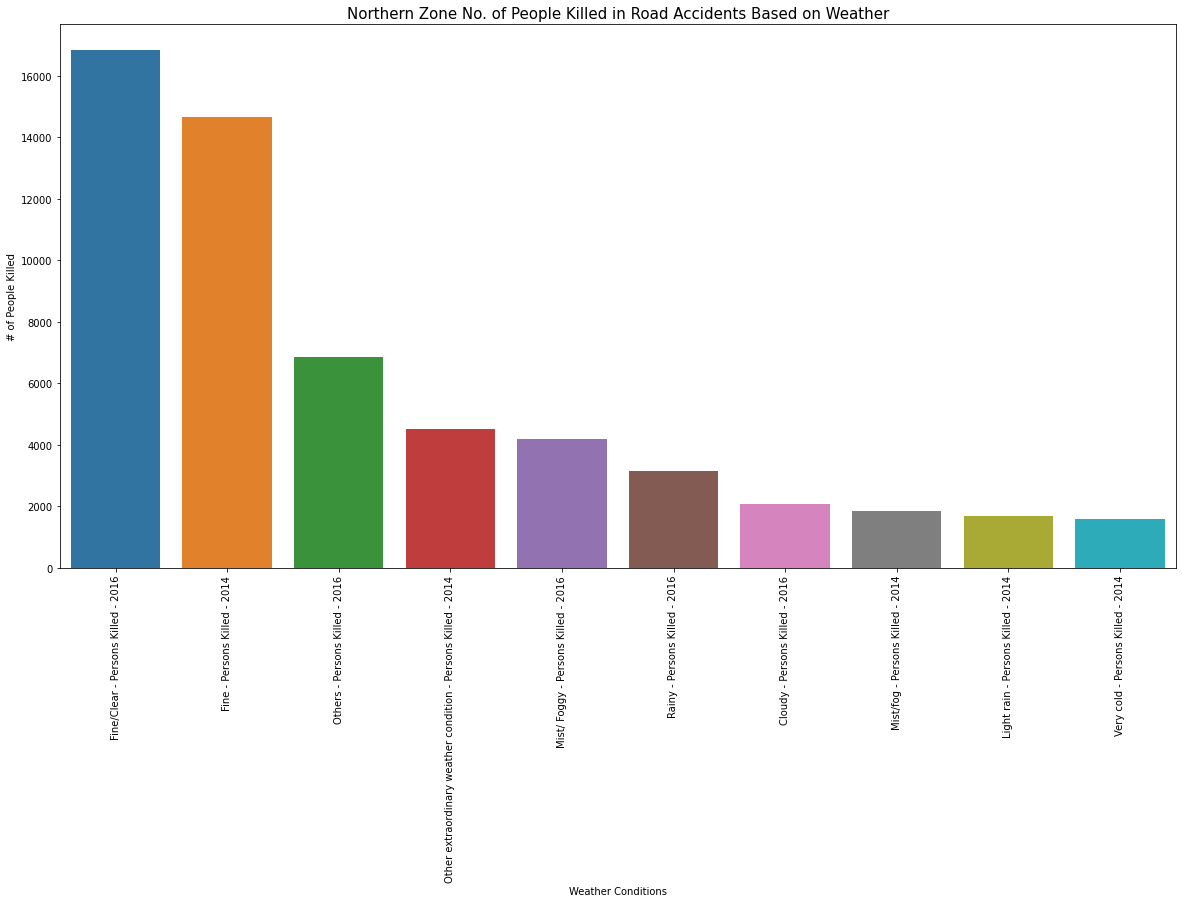

In [27]:
# Weather Conditions - No. of People Killed in Road Accidents (North Zone)

sub_df = weather_df_killed[weather_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Northern Zone No. of People Killed in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)

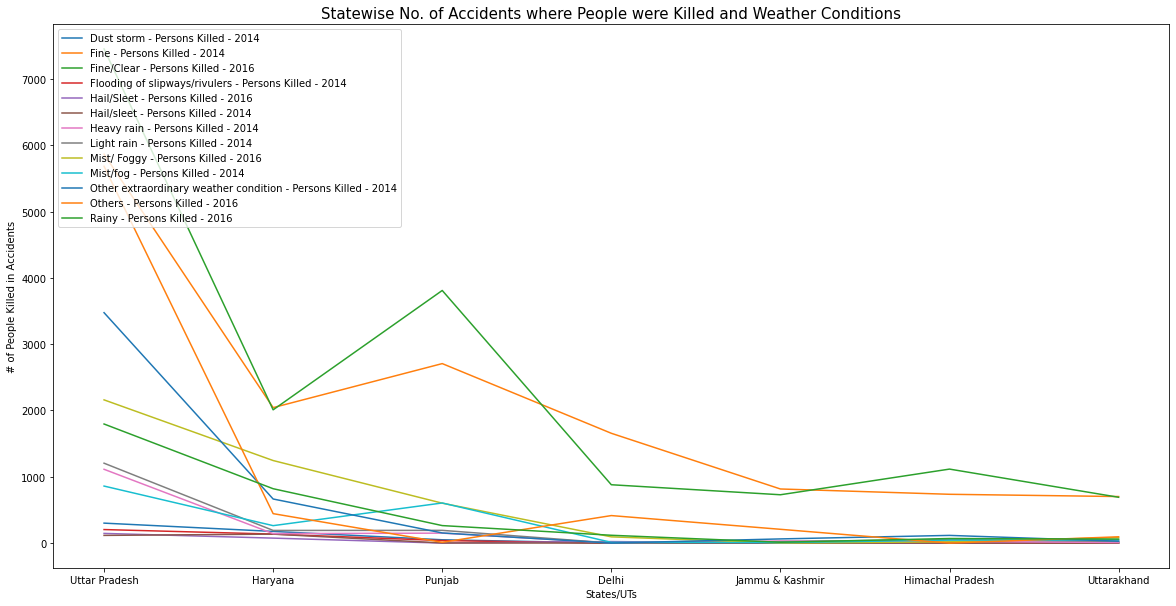

In [28]:
sub_df = weather_df_killed[weather_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[5:18])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

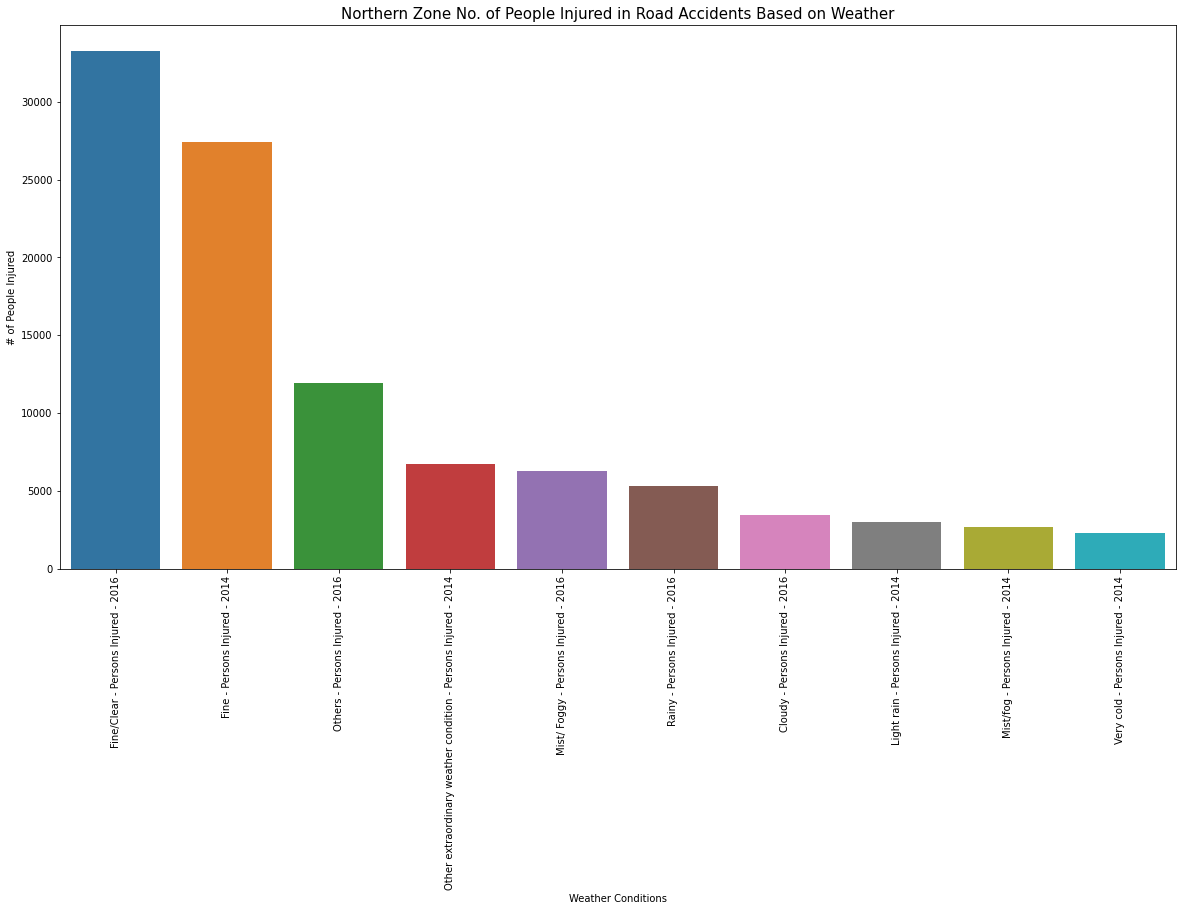

In [29]:
# Weather Conditions - No. of People Injured in Road Accidents (North Zone)

sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Weather Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))

sns.barplot(x=df['Weather Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Weather', fontsize=15)
plt.xticks(rotation=90)


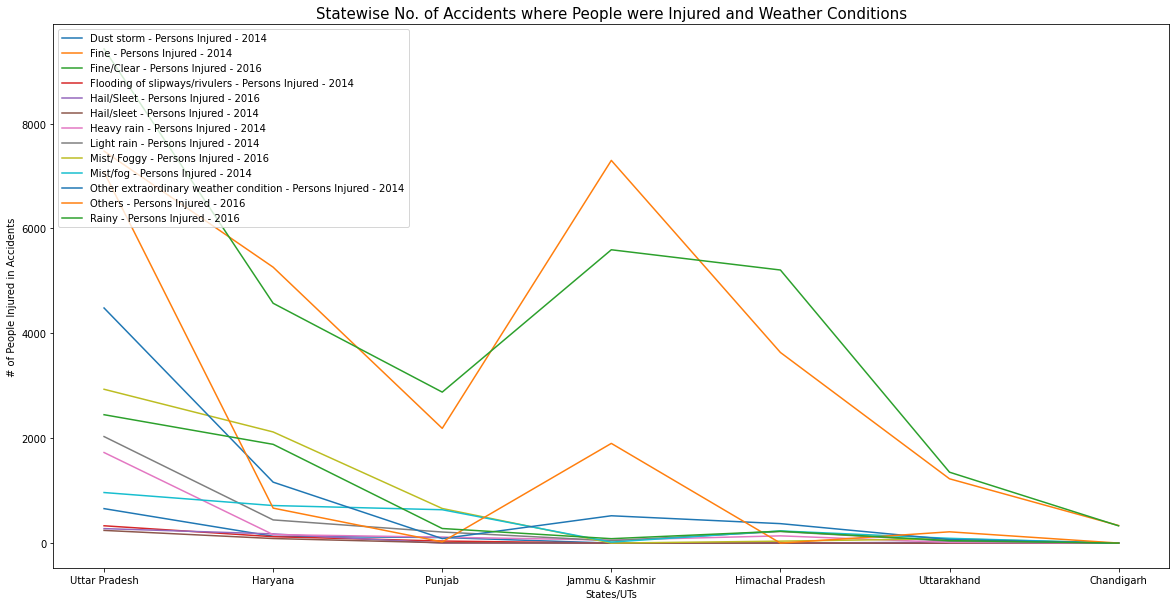

In [30]:
sub_df = weather_df_injured[weather_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[5:18])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Weather Conditions', fontsize=15)
    plt.legend(loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

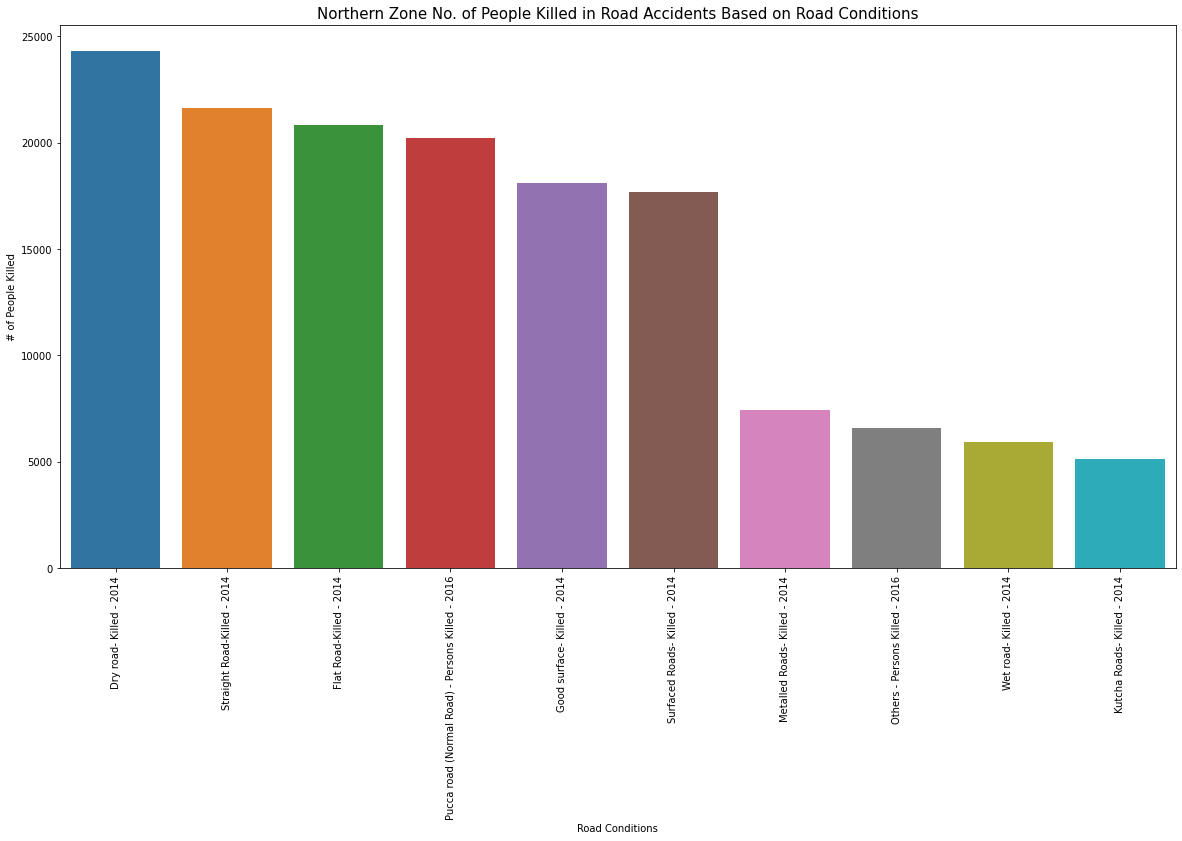

In [31]:
# Road Conditions - No. of People Killed in Road Accidents (North Zone)

sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Killed')
plt.title('Northern Zone No. of People Killed in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

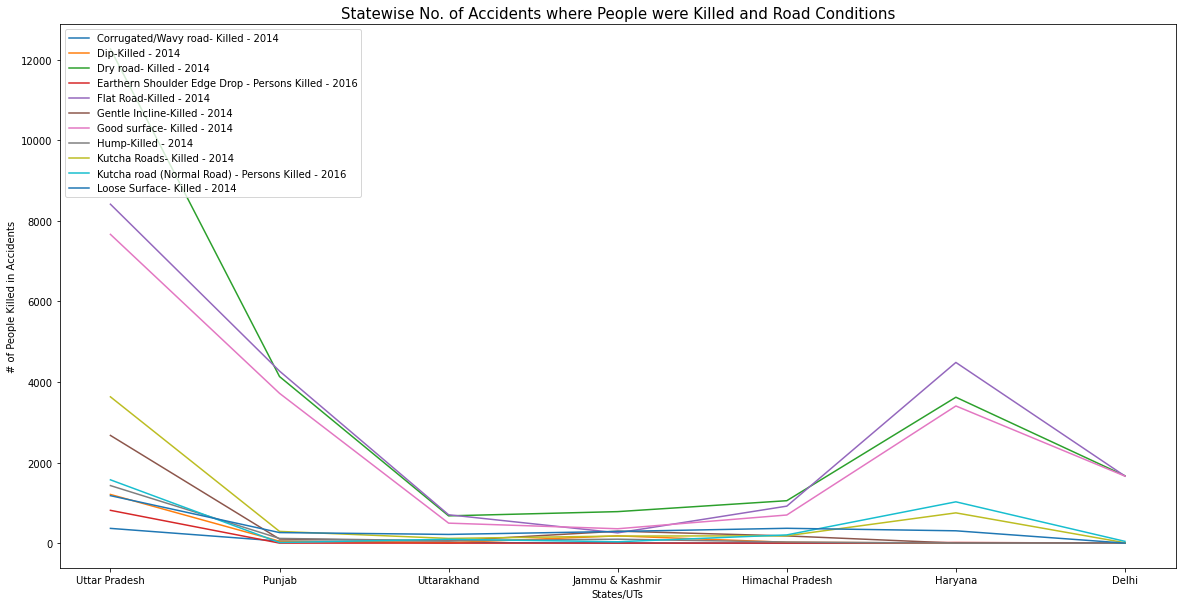

In [32]:
sub_df = roadcond_df_killed[roadcond_df_killed['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Killed in Accidents')
    plt.title('Statewise No. of Accidents where People were Killed and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

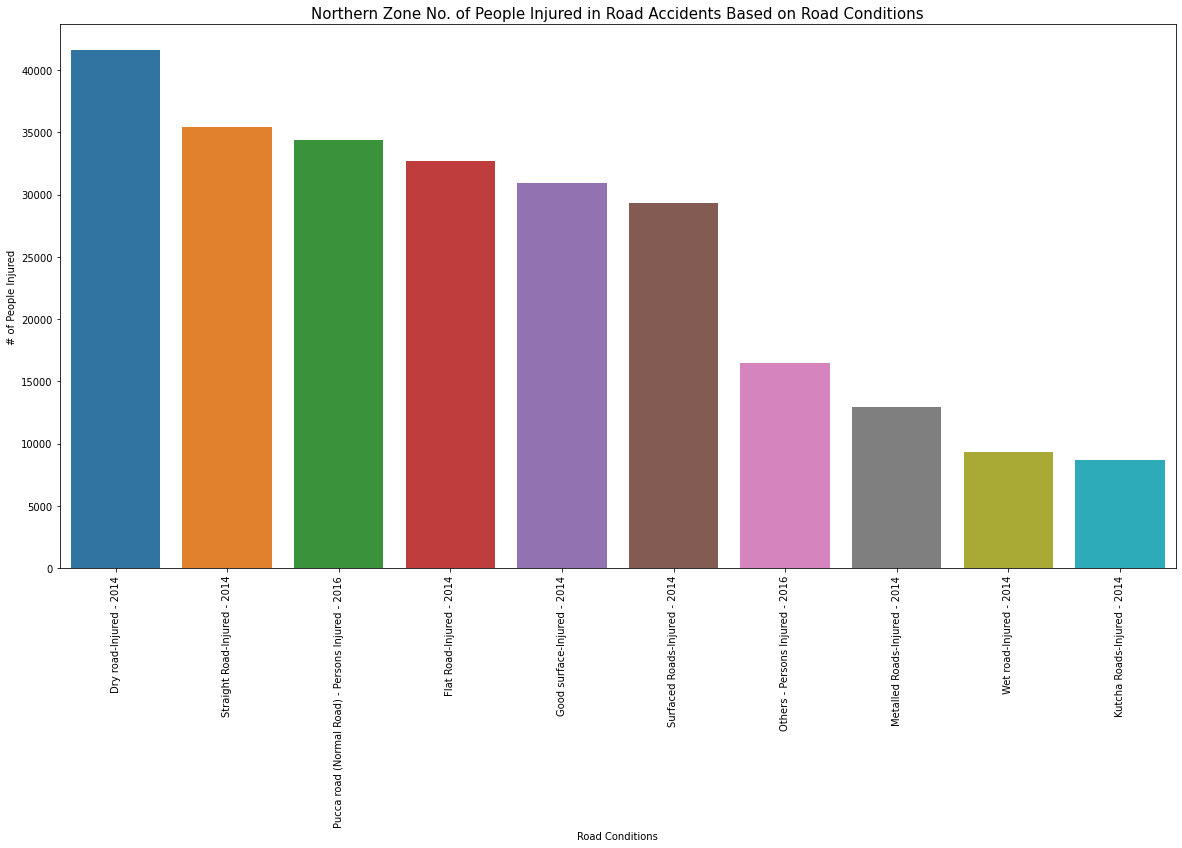

In [33]:
# Road Conditions - No. of People Injured in Road Accidents (North Zone)

sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['Zones'],aggfunc=np.sum).reset_index()
df = df.T.reset_index()
df = df.rename(columns = {'index': 'Road Conditions', 0: 'Total'})
df = df.drop(df.index[0])
df = df.sort_values(by = ['Total'], ascending=False).head(10)
df

fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.barplot(x=df['Road Conditions'],y=df['Total'])
plt.ylabel('# of People Injured')
plt.title('Northern Zone No. of People Injured in Road Accidents Based on Road Conditions', fontsize=15)
plt.xticks(rotation=90)

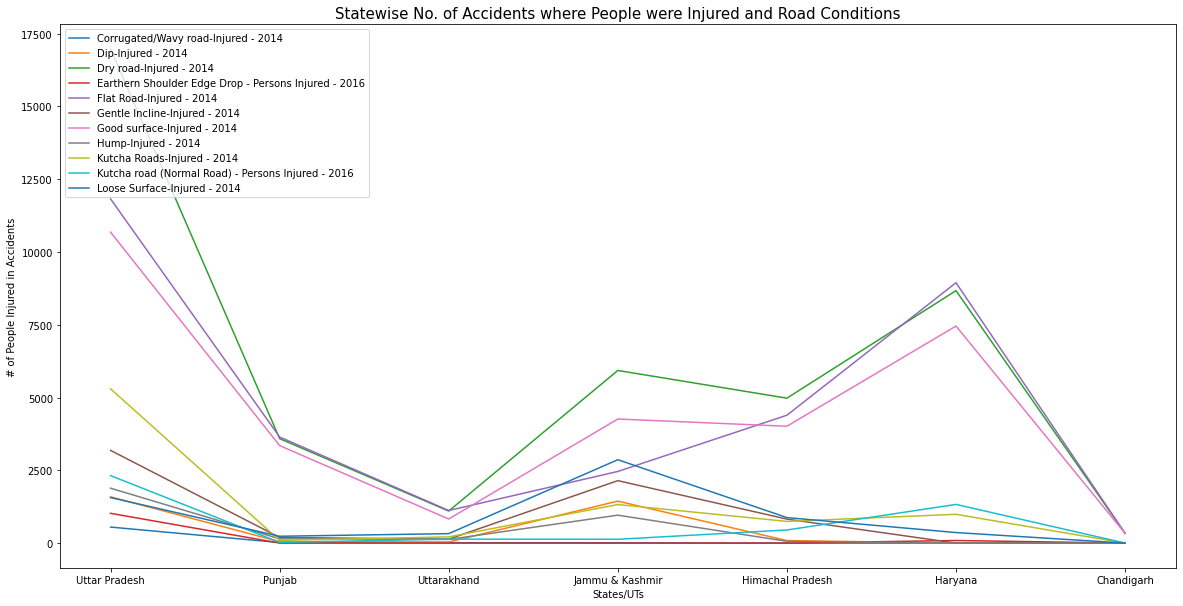

In [34]:
sub_df = roadcond_df_injured[roadcond_df_injured['Zones'] == 'North Zone']
df =pd.pivot_table(sub_df, index=['States/UTs'],aggfunc=np.sum).reset_index()
df = df.reset_index()
cols = list(df.columns[2:13])
df = df.sort_values(by=cols, ascending=False).head(7)

fig,ax = plt.subplots(1,1, figsize=(20,10))
for i,reason in enumerate(cols):
    sns.lineplot(x=df['States/UTs'],y=df[reason], label=cols[i])
    plt.ylabel('# of People Injured in Accidents')
    plt.title('Statewise No. of Accidents where People were Injured and Road Conditions', fontsize=15)
    plt.legend(loc='upper left')

In [35]:
'''Conclusion:
Thus, we see how the data reflects the findings that have been published. It also cleared the common misconception that I had about weather and unruly/winding roads contributing to more no. of accidents.'''

'Conclusion:\nThus, we see how the data reflects the findings that have been published. It also cleared the common misconception that I had about weather and unruly/winding roads contributing to more no. of accidents.'

In [36]:
''' Drive Safe Everyone !!!'''

' Drive Safe Everyone !!!'